In [32]:
from dataclasses import dataclass

from math import sqrt

In [33]:
@dataclass(frozen=True)
class Table1Row_raw:
    x1: float
    x2: float
    t1: float
    t2: float

@dataclass(frozen=True)
class Table1Row:
    x1: float
    x2: float

    t1: float
    t2: float

    Y: float
    Z: float

@dataclass(frozen=True)
class Table2BigRow:
    h: float
    h_: float
    subrows: list["Table2SubRow"]

@dataclass(frozen=True)
class Table2SubRow:
    t1: float
    t2: float

In [34]:
table1_raw = [
    Table1Row_raw(0.15, 0.4, 2.5, 3.8),
    Table1Row_raw(0.15, 0.5, 1.2, 2.8),
    Table1Row_raw(0.15, 0.7, 1.2, 3.4),
    Table1Row_raw(0.15, 0.9, 1.3, 3.9),
    Table1Row_raw(0.15, 1.1, 1.3, 4.4)
]

table2 = [
    Table2BigRow(
        189, 180,
        [
            Table2SubRow(1.3, 4.6),
            Table2SubRow(1.3, 4.6),
            Table2SubRow(1.2, 4.5),
            Table2SubRow(1.2, 4.5),
            Table2SubRow(1.3, 4.6)
        ]
    ),
    Table2BigRow(
        200, 181,
        [
            Table2SubRow(0.9, 3.1),
            Table2SubRow(0.9, 3.2),
            Table2SubRow(0.9, 3.2),
            Table2SubRow(0.8, 3.1),
            Table2SubRow(0.8, 3.1)
        ]
    ),
    Table2BigRow(
        209, 181,
        [
            Table2SubRow(0.8, 2.7),
            Table2SubRow(0.8, 2.7),
            Table2SubRow(0.8, 2.7),
            Table2SubRow(0.8, 2.8),
            Table2SubRow(0.8, 2.7)
        ]
    ),
    Table2BigRow(
        219, 182,
        [
            Table2SubRow(0.7, 2.3),
            Table2SubRow(0.7, 2.3),
            Table2SubRow(0.7, 2.3),
            Table2SubRow(0.7, 2.3),
            Table2SubRow(0.7, 2.2)
        ]
    ),
    Table2BigRow(
        230, 183,
        [
            Table2SubRow(0.6, 2.0),
            Table2SubRow(0.6, 2.0),
            Table2SubRow(0.6, 2.0),
            Table2SubRow(0.6, 2.0),
            Table2SubRow(0.6, 2.0)
        ]
    )
]

In [35]:
mean_sqr_diff = lambda x,y: (y**2 - x**2) / 2
diff = lambda x,y: y-x
std = lambda values, mean: sqrt(1/(len(values)*(len(values)-1)) * sum([(i - mean)**2 for i in values]))

In [36]:
table1_full = list(
    map(
        lambda x: Table1Row(
            x.x1, x.x2,
            x.t1, x.t2,
            diff(x.x1, x.x2),
            mean_sqr_diff(x.t1, x.t2),
        ),
        table1_raw
    )
)

In [37]:
a = sum(map(lambda x: x.Z*x.Y, table1_full)) / \
        sum(map(lambda x: x.Z**2, table1_full))

print(a)

0.10427094115155604


In [38]:
sigma_a = sqrt(
    sum(map(lambda x: (x.Y - a*x.Z)**2, table1_full)) / \
        (
            (len(table1_full)-1) *
            sum(map(lambda x: x.Z**2, table1_full))
        )
)

print(sigma_a)

0.007039313385761554


In [39]:
print(sigma_a*2)

0.014078626771523108


In [40]:
print(sigma_a*2/a * 100)

13.501965759626225


In [41]:
def calc_sin_a(
        h_0: float, h: float,
        h_0_: float, h_: float,
        x_: float, x: float
    ):
    return ((h_0 - h) - (h_0_ - h_)) / (x_ * 10**3 - x * 10**3)

In [42]:
sin_arr = [
    calc_sin_a(
        180.0, row.h,
        180.0, row.h_,
        0.220, 1.000
    )
    for row in table2
]
print(sin_arr)

[0.011538461538461539, 0.02435897435897436, 0.035897435897435895, 0.047435897435897434, 0.06025641025641026]


In [43]:
avg_t1_arr = [
    sum([subrow.t1 for subrow in row.subrows])/len(row.subrows)
    for row in table2
]
avg_t2_arr = [
    sum([subrow.t2 for subrow in row.subrows])/len(row.subrows)
    for row in table2
]
print("Avg t1:", avg_t1_arr)
print("Avg t2:", avg_t2_arr)

Avg t1: [1.26, 0.86, 0.8, 0.7, 0.6]
Avg t2: [4.56, 3.14, 2.72, 2.28, 2.0]


In [44]:
avg_a = [
    2 * (1.1 - 0.15) / (t2**2 - t1**2)
    for t1, t2 in zip(avg_t1_arr, avg_t2_arr)
]
print(avg_a)

[0.09892741851504741, 0.20833333333333331, 0.28113162878787873, 0.40353410925155053, 0.521978021978022]


In [45]:
std_t1 = [
    std([subrow.t1 for subrow in row.subrows], t)
    for t, row in zip(avg_t1_arr, table2)
]
trust_t1 = [
    i*2.015 for i in std_t1
]
abs_diff_t1 = [
    sqrt(i**2 + (2/3 * 0.1)**2)
    for i in trust_t1
]
print(std_t1)
print("Доверительный интервал:", trust_t1)
print("Абс. погр. с уч. инстр. погр.:", abs_diff_t1)

[0.024494897427831803, 0.02449489742783178, 0.0, 0.0, 0.0]
Доверительный интервал: [0.049357218317081085, 0.049357218317081036, 0.0, 0.0, 0.0]
Абс. погр. с уч. инстр. погр.: [0.08294925825132163, 0.0829492582513216, 0.06666666666666667, 0.06666666666666667, 0.06666666666666667]


In [46]:
std_t2 = [
    std([subrow.t2 for subrow in row.subrows], t)
    for t, row in zip(avg_t2_arr, table2)
]
trust_t2 = [
    i*2.015 for i in std_t2
]
abs_diff_t2 = [
    sqrt(i**2 + (2/3 * 0.1)**2)
    for i in trust_t2
]
print(std_t2)
print("Доверительный интервал:", trust_t2)
print("Абс. погр. с уч. инстр. погр.:", abs_diff_t2)

[0.024494897427831695, 0.024494897427831803, 0.019999999999999928, 0.019999999999999928, 0.0]
Доверительный интервал: [0.04935721831708087, 0.049357218317081085, 0.04029999999999986, 0.04029999999999986, 0.0]
Абс. погр. с уч. инстр. погр.: [0.0829492582513215, 0.08294925825132163, 0.07790079874073458, 0.07790079874073458, 0.06666666666666667]


In [47]:
avg_a_delta = [
    a * sqrt(
        ((0.005)**2 + (0.005)**2)/((1.1-0.15)**2) +
        4 * ((t1*diff_t1)**2 + (t2*diff_t2)**2)/((t2**2 - t1**2)**2)
        )
    for a, t1, t2, diff_t1, diff_t2 in zip(avg_a, avg_t1_arr, avg_t2_arr, abs_diff_t1, abs_diff_t2)
]
print(avg_a_delta)

[0.004109142111627977, 0.012435013923759548, 0.018298022211155583, 0.031621132839018413, 0.040112485935813284]


In [48]:
print(avg_a)

[0.09892741851504741, 0.20833333333333331, 0.28113162878787873, 0.40353410925155053, 0.521978021978022]


In [49]:
g = (
    sum([a * angle for a, angle in zip(avg_a, sin_arr)]) -
    1/5*sum([a for a in avg_a])*sum([angle for angle in sin_arr])
) / (
    sum([angle**2 for angle in sin_arr]) -
    1/5*sum([angle for angle in sin_arr])**2
)

In [50]:
print(g)

8.642442749171005


In [51]:
A = (1/5) * (sum(avg_a) - g * sum(sin_arr))

In [52]:
print(A)

-0.0074606322124594285


In [53]:
g_std = sqrt(
    (
        sum([
            (a-(A+g*angle))**2
            for a, angle in zip(avg_a, sin_arr)
        ])
    ) / ((
        sum([
            angle**2
            for angle in sin_arr
        ]) -
        (1/5) * sum([
            angle
            for angle in sin_arr
        ])**2
    )*3)
)

In [54]:
print(g_std)

0.3763163977396315


In [55]:
print(2*g_std)

0.752632795479263


In [56]:
print(2*g_std/g*100)

8.708565591035667


In [57]:
print(abs(g-9.82))

1.177557250828995


In [58]:
print(abs(g-9.82)/9.82)

0.11991418032881823


In [59]:
print(a)

0.10427094115155604


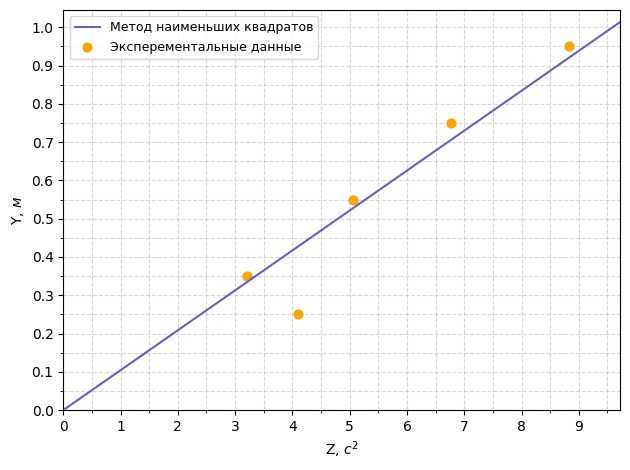

In [62]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

ax = plt.axes()
ax.yaxis.set_major_locator(MultipleLocator(0.1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1/2))
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(1/2))

Z_param_arr = [elem.Z for elem in table1_full]
Y_param_arr = [elem.Y for elem in table1_full]

x_max = max(Z_param_arr) * 1.1
y_max = max(Y_param_arr) * 1.1

ax.set_xlim(0, x_max)
ax.set_ylim(0, y_max)


# linear
plt.plot(
    [0, x_max],
    [0, a*x_max],
    color ="#6263c1",
    
    label='Метод наименьших квадратов'
)

# points
plt.scatter(
    Z_param_arr,
    Y_param_arr,
    color='orange',
    s=40,
    marker='o',

    label='Эксперементальные данные'
)

# plot settings
plt.grid(True, alpha=0.5, linestyle='--', which='both')

plt.ylabel(r'Y, $м$', fontsize = 10)
plt.xlabel(r'Z, $c^2$', fontsize = 10)

plt.legend(
    loc="upper left",
    fontsize=9
)
plt.tight_layout()

plt.savefig("plot1.png", dpi=1200)

plt.show()

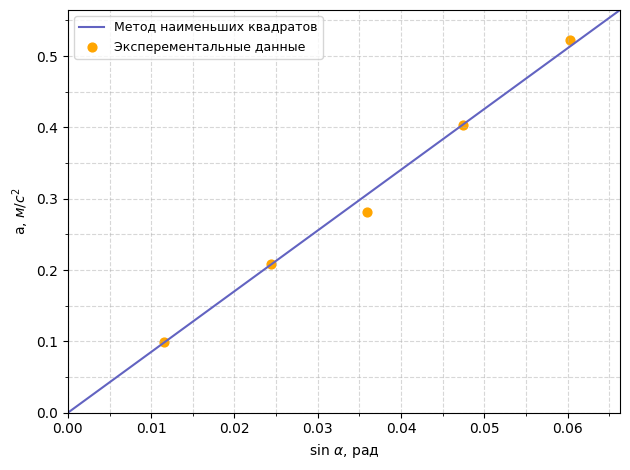

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import numpy as np

ax = plt.axes()
ax.yaxis.set_minor_locator(MultipleLocator(0.1/2))
ax.xaxis.set_minor_locator(MultipleLocator(0.01/2))

x_max = max(sin_arr) * 1.1
y_max = (A + g*max(sin_arr)) * 1.1

ax.set_xlim(0, x_max)
ax.set_ylim(0, y_max)

# linear
plt.plot(
    [0, x_max],
    [A, y_max],
    color ="#6263c1",
    
    label='Метод наименьших квадратов'
)

# points
plt.scatter(
    sin_arr,
    avg_a,
    color='orange',
    s=40,
    marker='o',

    label='Эксперементальные данные'
)

# plot settings
plt.grid(True, alpha=0.5, linestyle='--', which='both')

plt.ylabel(r'a, $м/с^2$', fontsize = 10)
plt.xlabel(r'sin $\alpha$, рад', fontsize = 10)

plt.legend(
    loc="upper left",
    fontsize=9
)
plt.tight_layout()

plt.savefig("plot2.png", dpi=1200)

plt.show()